In [1]:
import pandas as pd
import networkx as nx

In [29]:
import matplotlib.pyplot as plt

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql import functions as func

In [4]:
# Path to your GraphFrames JAR
graphframes_jar_path = "/Users/mirkoleccese/Documents/GITHUB_PROJECTS/MACHINE-LEARNING/The-Machine-Learning-Project/graphframes-0.8.4-spark3.5-s_2.12.jar"

In [39]:
spark = SparkSession.builder \
    .appName("GraphFramesExample") \
    .config("spark.jars", graphframes_jar_path) \
    .getOrCreate()

In [6]:
from graphframes import *

In [7]:
vertices = spark.createDataFrame([('1', 'Carter', 'Derrick', 50), 
                                  ('2', 'May', 'Derrick', 26),
                                 ('3', 'Mills', 'Jeff', 80),
                                  ('4', 'Hood', 'Robert', 65),
                                  ('5', 'Banks', 'Mike', 93),
                                 ('98', 'Berg', 'Tim', 28),
                                 ('99', 'Page', 'Allan', 16)],
                                 ['id', 'name', 'firstname', 'age'])

In [8]:
edges = spark.createDataFrame([('1', '2', 'friend'), 
                               ('2', '1', 'friend'),
                              ('3', '1', 'friend'),
                              ('1', '3', 'friend'),
                               ('2', '3', 'follows'),
                               ('3', '4', 'friend'),
                               ('4', '3', 'friend'),
                               ('5', '3', 'friend'),
                               ('3', '5', 'friend'),
                               ('4', '5', 'follows'),
                              ('98', '99', 'friend'),
                              ('99', '98', 'friend')],
                              ['src', 'dst', 'type'])

In [9]:
g = GraphFrame(vertices, edges)

/Users/mirkoleccese/.local/share/virtualenvs/The-Machine-Learning-Project-IzU1WuAf/lib/python3.11/site-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [10]:
g.vertices.show()

+---+------+---------+---+
| id|  name|firstname|age|
+---+------+---------+---+
|  1|Carter|  Derrick| 50|
|  2|   May|  Derrick| 26|
|  3| Mills|     Jeff| 80|
|  4|  Hood|   Robert| 65|
|  5| Banks|     Mike| 93|
| 98|  Berg|      Tim| 28|
| 99|  Page|    Allan| 16|
+---+------+---------+---+



In [11]:
g.edges.show()

+---+---+-------+
|src|dst|   type|
+---+---+-------+
|  1|  2| friend|
|  2|  1| friend|
|  3|  1| friend|
|  1|  3| friend|
|  2|  3|follows|
|  3|  4| friend|
|  4|  3| friend|
|  5|  3| friend|
|  3|  5| friend|
|  4|  5|follows|
| 98| 99| friend|
| 99| 98| friend|
+---+---+-------+



In [41]:
spark.sparkContext.setCheckpointDir('graphframes_cps')

In [42]:
g.connectedComponents().show()

/Users/mirkoleccese/.local/share/virtualenvs/The-Machine-Learning-Project-IzU1WuAf/lib/python3.11/site-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+------+---------+---+------------+
| id|  name|firstname|age|   component|
+---+------+---------+---+------------+
|  1|Carter|  Derrick| 50|154618822656|
|  2|   May|  Derrick| 26|154618822656|
|  3| Mills|     Jeff| 80|154618822656|
|  4|  Hood|   Robert| 65|154618822656|
|  5| Banks|     Mike| 93|154618822656|
| 98|  Berg|      Tim| 28|317827579904|
| 99|  Page|    Allan| 16|317827579904|
+---+------+---------+---+------------+



In [12]:
v_pandas = vertices.toPandas()
e_pandas = edges.toPandas()

In [21]:
nx_g = nx.DiGraph()

In [22]:
for _, row in v_pandas.iterrows():
    nx_g.add_node(row["id"], **row.to_dict())

In [26]:
for _, row in e_pandas.iterrows():
    nx_g.add_edge(row["src"], row["dst"], **row.to_dict())

In [27]:
nx_g.number_of_nodes()

7

In [28]:
nx_g.number_of_edges()

12

Text(0.5, 1.0, 'GraphFrames Visualization')

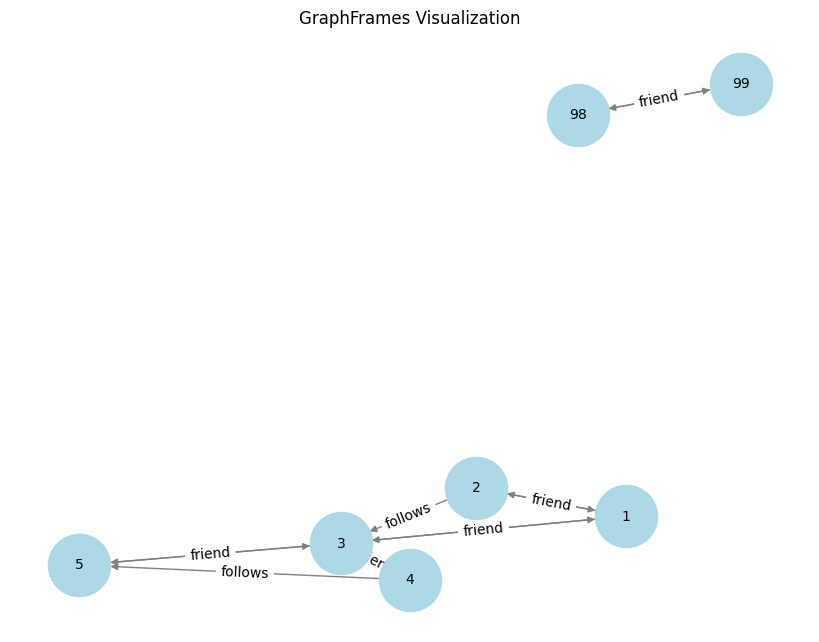

In [33]:
# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_g)  # Layout for positioning the nodes
nx.draw(nx_g, pos, with_labels=True, node_color="lightblue", font_size=10, node_size=2000, edge_color="gray")
nx.draw_networkx_edge_labels(nx_g, pos, edge_labels={(e[0], e[1]): e[2]["type"] for e in nx_g.edges(data=True)})
plt.title("GraphFrames Visualization")